In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds

print("TensorFlow:", tf.__version__)


TensorFlow: 2.16.2


In [2]:
from pathlib import Path

PROJECT_ROOT = Path.home() / "Documents" / "AI_Learning" / "realworld_image_classifier"
DATA_DIR = PROJECT_ROOT / "data" / "raw"
DATA_DIR.mkdir(parents=True, exist_ok=True)

print("PROJECT_ROOT:", PROJECT_ROOT)
print("DATA_DIR:", DATA_DIR)


PROJECT_ROOT: /Users/denuwanumayanga/Documents/AI_Learning/realworld_image_classifier
DATA_DIR: /Users/denuwanumayanga/Documents/AI_Learning/realworld_image_classifier/data/raw


In [4]:
from pathlib import Path

PROJECT_ROOT = Path.home() / "Documents" / "AI_Learning" / "realworld_image_classifier"
RAW_DIR = PROJECT_ROOT / "data" / "raw"
DOWNLOADS_DIR = RAW_DIR / "downloads"

zip_path = DOWNLOADS_DIR / "cats_dogs_light.zip"

print("ZIP path:", zip_path)
print("Exists:", zip_path.exists())


ZIP path: /Users/denuwanumayanga/Documents/AI_Learning/realworld_image_classifier/data/raw/downloads/cats_dogs_light.zip
Exists: True


In [5]:
import zipfile

extract_dir = RAW_DIR / "cats_dogs_light"
extract_dir.mkdir(parents=True, exist_ok=True)

with zipfile.ZipFile(zip_path, "r") as z:
    z.extractall(extract_dir)

print("Extracted to:", extract_dir)


Extracted to: /Users/denuwanumayanga/Documents/AI_Learning/realworld_image_classifier/data/raw/cats_dogs_light


In [6]:
import os

for root, dirs, files in os.walk(extract_dir):
    print(root)
    break


/Users/denuwanumayanga/Documents/AI_Learning/realworld_image_classifier/data/raw/cats_dogs_light


In [7]:
for d in extract_dir.iterdir():
    print(d)


/Users/denuwanumayanga/Documents/AI_Learning/realworld_image_classifier/data/raw/cats_dogs_light/__MACOSX
/Users/denuwanumayanga/Documents/AI_Learning/realworld_image_classifier/data/raw/cats_dogs_light/cats_dogs_light


In [8]:
from pathlib import Path

PROJECT_ROOT = Path.home() / "Documents" / "AI_Learning" / "realworld_image_classifier"
RAW_DIR = PROJECT_ROOT / "data" / "raw"

extract_dir = RAW_DIR / "cats_dogs_light"
real_data_dir = extract_dir / "cats_dogs_light"   # <-- IMPORTANT

print("Real data dir:", real_data_dir)
print("Exists:", real_data_dir.exists())

print("Inside real_data_dir:")
for d in real_data_dir.iterdir():
    print(" -", d.name)


Real data dir: /Users/denuwanumayanga/Documents/AI_Learning/realworld_image_classifier/data/raw/cats_dogs_light/cats_dogs_light
Exists: True
Inside real_data_dir:
 - .DS_Store
 - test
 - train


In [9]:
train_src = real_data_dir / "train"
test_src  = real_data_dir / "test"

print("Inside train_src:")
for d in train_src.iterdir():
    print(" -", d.name)

print("\nInside test_src:")
for d in test_src.iterdir():
    print(" -", d.name)


Inside train_src:
 - cat.10151.jpg
 - dog.1035.jpg
 - dog.1021.jpg
 - dog.10208.jpg
 - cat.10145.jpg
 - dog.10220.jpg
 - dog.1009.jpg
 - cat.10179.jpg
 - dog.10234.jpg
 - cat.10192.jpg
 - cat.10186.jpg
 - cat.1013.jpg
 - cat.10353.jpg
 - cat.10347.jpg
 - cat.1007.jpg
 - dog.10022.jpg
 - dog.10036.jpg
 - cat.10390.jpg
 - cat.10384.jpg
 - cat.10227.jpg
 - cat.10233.jpg
 - dog.10156.jpg
 - dog.10142.jpg
 - dog.10195.jpg
 - dog.10181.jpg
 - cat.10025.jpg
 - dog.10368.jpg
 - cat.10031.jpg
 - dog.10354.jpg
 - cat.10019.jpg
 - dog.10432.jpg
 - dog.10426.jpg
 - dog.10340.jpg
 - dog.10397.jpg
 - dog.10383.jpg
 - dog.10382.jpg
 - dog.10396.jpg
 - dog.10427.jpg
 - dog.10341.jpg
 - cat.10018.jpg
 - dog.10355.jpg
 - dog.10433.jpg
 - cat.10030.jpg
 - dog.10369.jpg
 - cat.10024.jpg
 - dog.10180.jpg
 - dog.10194.jpg
 - dog.10143.jpg
 - dog.10157.jpg
 - cat.10232.jpg
 - cat.10226.jpg
 - cat.10385.jpg
 - cat.10391.jpg
 - dog.10037.jpg
 - dog.10023.jpg
 - cat.1006.jpg
 - cat.10346.jpg
 - cat.10352.jpg
 -

In [10]:
test_src = real_data_dir / "test"
print("Test folder exists:", test_src.exists())
if test_src.exists():
    # show a few filenames
    sample = list(test_src.glob("*.jpg"))[:10]
    for p in sample:
        print(" -", p.name)


Test folder exists: True
 - cat.9895.jpg
 - cat.9881.jpg
 - dog.991.jpg
 - dog.985.jpg
 - cat.9856.jpg
 - cat.991.jpg
 - cat.985.jpg
 - cat.9842.jpg
 - dog.9870.jpg
 - dog.9864.jpg


In [11]:
test_src = real_data_dir / "test"
print("Test folder exists:", test_src.exists())


Test folder exists: True


In [12]:
dataset_root = RAW_DIR / "dataset"

train_cat = dataset_root / "train" / "cat"
train_dog = dataset_root / "train" / "dog"
val_cat   = dataset_root / "val"   / "cat"
val_dog   = dataset_root / "val"   / "dog"
test_cat  = dataset_root / "test"  / "cat"
test_dog  = dataset_root / "test"  / "dog"

for d in [train_cat, train_dog, val_cat, val_dog, test_cat, test_dog]:
    d.mkdir(parents=True, exist_ok=True)

print("Created dataset folders at:", dataset_root)


Created dataset folders at: /Users/denuwanumayanga/Documents/AI_Learning/realworld_image_classifier/data/raw/dataset


In [13]:
import random, shutil

train_src = real_data_dir / "train"

all_imgs = list(train_src.glob("*.jpg")) + list(train_src.glob("*.jpeg")) + list(train_src.glob("*.png"))

cats = [p for p in all_imgs if p.name.startswith("cat.")]
dogs = [p for p in all_imgs if p.name.startswith("dog.")]

print("Found cats:", len(cats))
print("Found dogs:", len(dogs))

random.shuffle(cats)
random.shuffle(dogs)

def split_copy(images, train_dir, val_dir, split_ratio=0.8):
    split = int(len(images) * split_ratio)
    for img in images[:split]:
        shutil.copy(img, train_dir / img.name)
    for img in images[split:]:
        shutil.copy(img, val_dir / img.name)

split_copy(cats, train_cat, val_cat, 0.8)
split_copy(dogs, train_dog, val_dog, 0.8)

print("\nFinal counts:")
print("Train cats:", len(list(train_cat.iterdir())))
print("Train dogs:", len(list(train_dog.iterdir())))
print("Val cats:", len(list(val_cat.iterdir())))
print("Val dogs:", len(list(val_dog.iterdir())))


Found cats: 455
Found dogs: 545

Final counts:
Train cats: 364
Train dogs: 436
Val cats: 91
Val dogs: 109


In [14]:
if test_src.exists():
    test_imgs = list(test_src.glob("*.jpg")) + list(test_src.glob("*.jpeg")) + list(test_src.glob("*.png"))
    test_cats = [p for p in test_imgs if p.name.startswith("cat.")]
    test_dogs = [p for p in test_imgs if p.name.startswith("dog.")]

    for img in test_cats:
        shutil.copy(img, test_cat / img.name)
    for img in test_dogs:
        shutil.copy(img, test_dog / img.name)

    print("Test cats:", len(list(test_cat.iterdir())))
    print("Test dogs:", len(list(test_dog.iterdir())))
else:
    print("No test folder found — skipping.")


Test cats: 200
Test dogs: 200


In [15]:
import tensorflow as tf
from pathlib import Path

dataset_root = Path.home() / "Documents" / "AI_Learning" / "realworld_image_classifier" / "data" / "raw" / "dataset"

train_dir = dataset_root / "train"
val_dir   = dataset_root / "val"
test_dir  = dataset_root / "test"

IMG_SIZE = (224, 224)
BATCH_SIZE = 32

train_ds = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int",
    shuffle=True
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    val_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int",
    shuffle=False
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    test_dir,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    label_mode="int",
    shuffle=False
)

class_names = train_ds.class_names
print("Classes:", class_names)


Found 800 files belonging to 2 classes.
Found 200 files belonging to 2 classes.
Found 400 files belonging to 2 classes.
Classes: ['cat', 'dog']


2025-12-13 07:28:22.049449: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M4
2025-12-13 07:28:22.049518: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2025-12-13 07:28:22.049537: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2025-12-13 07:28:22.049804: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-12-13 07:28:22.049831: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


2025-12-13 07:28:54.276697: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


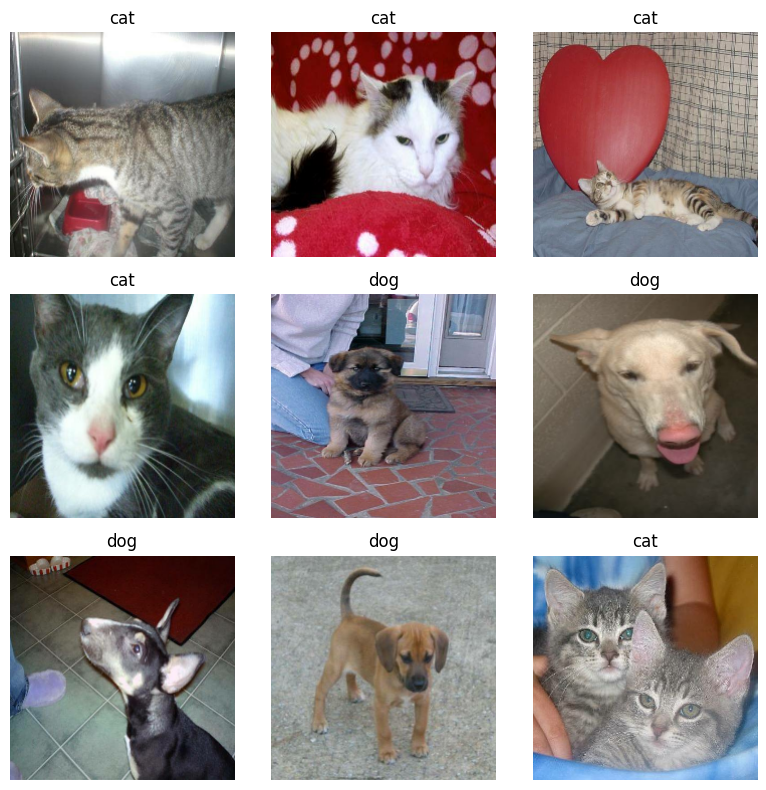

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[int(labels[i])])
        plt.axis("off")
plt.tight_layout()
plt.show()


In [19]:
AUTOTUNE = tf.data.AUTOTUNE

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomZoom(0.1),
])

train_ds_aug = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y)).prefetch(AUTOTUNE)
val_ds_pf = val_ds.prefetch(AUTOTUNE)
test_ds_pf = test_ds.prefetch(AUTOTUNE)


In [20]:
base = tf.keras.applications.MobileNetV2(
    input_shape=(224, 224, 3),
    include_top=False,
    weights="imagenet"
)
base.trainable = False  # freeze pretrained features

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(224, 224, 3)),
    tf.keras.layers.Rescaling(1./255),  # normalize pixels
    base,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation="sigmoid")  # binary output
])

model.compile(
    optimizer="adam",
    loss="binary_crossentropy",
    metrics=["accuracy"]
)

model.summary()


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 13s 1us/step


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │         1,281 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,259,265 (8.62 MB)

 Trainable params: 1,281 (5.00 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [21]:
history = model.fit(train_ds_aug, validation_data=val_ds_pf, epochs=5)


Epoch 1/5


2025-12-13 07:31:17.222169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 170ms/step - accuracy: 0.8363 - loss: 0.3877 - val_accuracy: 0.9550 - val_loss: 0.1908
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.9463 - loss: 0.1612 - val_accuracy: 0.9550 - val_loss: 0.1276
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 124ms/step - accuracy: 0.9600 - loss: 0.1245 - val_accuracy: 0.9700 - val_loss: 0.1032
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 122ms/step - accuracy: 0.9675 - loss: 0.1019 - val_accuracy: 0.9750 - val_loss: 0.0905
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 3s 123ms/step - accuracy: 0.9725 - loss: 0.0901 - val_accuracy: 0.9800 - val_loss: 0.0854


In [22]:
test_loss, test_acc = model.evaluate(test_ds_pf)
print("Test accuracy:", test_acc)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 107ms/step - accuracy: 0.9825 - loss: 0.0617
Test accuracy: 0.9825000166893005


In [23]:
import numpy as np
from sklearn.metrics import confusion_matrix

# get predictions
y_true = np.concatenate([y.numpy() for _, y in test_ds])
y_prob = model.predict(test_ds_pf, verbose=0).ravel()
y_pred = (y_prob >= 0.5).astype(int)

cm = confusion_matrix(y_true, y_pred)
print(cm)


2025-12-13 07:32:20.063495: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


[[194   6]
 [  1 199]]


Wrong predictions: 7


2025-12-13 07:32:35.151159: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


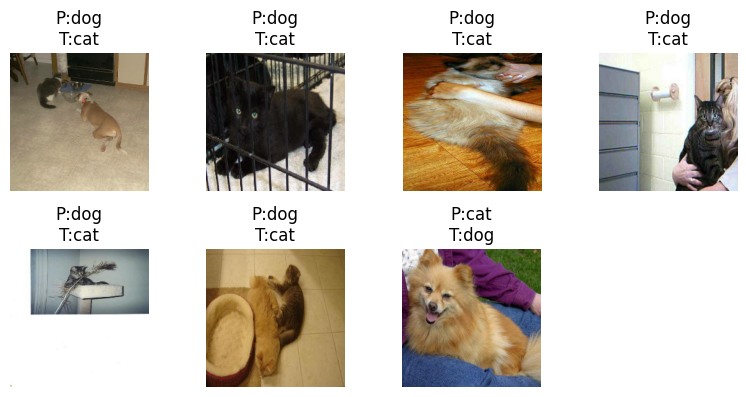

In [24]:
import matplotlib.pyplot as plt

wrong = np.where(y_pred != y_true)[0]
print("Wrong predictions:", len(wrong))

# show up to 16 wrong images
show_n = min(16, len(wrong))
idxs = wrong[:show_n]

# collect test images in the same order used for predictions
x_test_all = np.concatenate([x.numpy() for x, _ in test_ds], axis=0)

plt.figure(figsize=(8, 8))
for i, idx in enumerate(idxs):
    plt.subplot(4, 4, i+1)
    plt.imshow(x_test_all[idx].astype("uint8"))
    true_name = class_names[y_true[idx]]
    pred_name = class_names[y_pred[idx]]
    plt.title(f"P:{pred_name}\nT:{true_name}")
    plt.axis("off")
plt.tight_layout()
plt.show()


In [25]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, target_names=class_names))


              precision    recall  f1-score   support

         cat       0.99      0.97      0.98       200
         dog       0.97      0.99      0.98       200

    accuracy                           0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400



In [26]:
from pathlib import Path

models_dir = Path.home() / "Documents" / "AI_Learning" / "realworld_image_classifier" / "models"
models_dir.mkdir(parents=True, exist_ok=True)

model_path = models_dir / "cats_vs_dogs_mobilenetv2.keras"
model.save(model_path)

print("Saved model to:", model_path)
print("Exists:", model_path.exists())


Saved model to: /Users/denuwanumayanga/Documents/AI_Learning/realworld_image_classifier/models/cats_vs_dogs_mobilenetv2.keras
Exists: True
